#Mục Tiêu
- Xây dựng mô hình học máy để phát hiện hồ sơ mở tài khoản ngân hàng gian lận
- dựa trên các đặc trưng nhân khẩu học, hành vi giao dịch, thiết bị và danh tính.
- Bài toán được mô hình hóa dưới dạng phân loại nhị phân.




#Load dữ liệu

In [146]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# Khai báo đường dẫn thư mục
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/archive (7)"



In [148]:
# Load từng file CSV
df_base = pd.read_csv(os.path.join(base_dir, "Base.csv"))

# df_v1 = pd.read_csv(os.path.join(base_dir, "Variant I.csv"))
# df_v2 = pd.read_csv(os.path.join(base_dir, "Variant II.csv"))
# df_v3 = pd.read_csv(os.path.join(base_dir, "Variant III.csv"))
# df_v4 = pd.read_csv(os.path.join(base_dir, "Variant IV.csv"))
# df_v5 = pd.read_csv(os.path.join(base_dir, "Variant V.csv"))


In [149]:
df_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [150]:
df_base.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

Mô tả dữ liệu:
* Bảng có 1000000 dòng và 5 cột.
* Không có giá trị nào bị thiếu.

Các cột và kiểu dữ liệu:
* fraud_bool:
Biến mục tiêu, cho biết giao dịch có phải gian lận hay không.
Giá trị: 0 (không gian lận), 1 (gian lận).
Kiểu dữ liệu: int64.

* income:
Thu nhập ước tính của khách hàng.
Kiểu dữ liệu: float64.

* name_email_similarity:
Mức độ tương đồng giữa tên khách hàng và địa chỉ email (giá trị càng cao càng giống).
Kiểu dữ liệu: float64.

* prev_address_months_count:
Số tháng khách hàng sinh sống tại địa chỉ trước đó.
Kiểu dữ liệu: int64.

* current_address_months_count:
Số tháng khách hàng sinh sống tại địa chỉ hiện tại.
Kiểu dữ liệu: int64.

* customer_age:
Tuổi của khách hàng tại thời điểm giao dịch.
Kiểu dữ liệu: int64.

* days_since_request:
Số ngày kể từ lần yêu cầu giao dịch gần nhất.
Kiểu dữ liệu: float64.

* intended_balcon_amount:
Số tiền dự kiến sử dụng hoặc yêu cầu trong giao dịch.
Kiểu dữ liệu: float64.

* payment_type:
Loại hình thanh toán được sử dụng (ví dụ: thẻ, chuyển khoản, ví điện tử…).
Kiểu dữ liệu: object.

* zip_count_4w:
Số giao dịch được thực hiện từ cùng mã bưu điện trong 4 tuần gần nhất.
Kiểu dữ liệu: int64.

* velocity_6h:
Tần suất giao dịch của khách hàng trong vòng 6 giờ.
Kiểu dữ liệu: float64.

* velocity_24h:
Tần suất giao dịch của khách hàng trong vòng 24 giờ.
Kiểu dữ liệu: float64.

* velocity_4w:
Tần suất giao dịch của khách hàng trong vòng 4 tuần.
Kiểu dữ liệu: float64.

* bank_branch_count_8w:
Số chi nhánh ngân hàng khác nhau được sử dụng trong 8 tuần gần nhất.
Kiểu dữ liệu: int64.

* date_of_birth_distinct_emails_4w:
Số email khác nhau có cùng ngày sinh được sử dụng trong 4 tuần.
Kiểu dữ liệu: int64.

* employment_status:
Trạng thái việc làm của khách hàng (đang làm việc, thất nghiệp, tự do…).
Kiểu dữ liệu: object.

* credit_risk_score:
Điểm đánh giá rủi ro tín dụng của khách hàng.
Kiểu dữ liệu: int64.

* email_is_free:
Cho biết email khách hàng có phải email miễn phí (Gmail, Yahoo…) hay không.
Giá trị: 0 (không), 1 (có).
Kiểu dữ liệu: int64.

* housing_status:
Tình trạng nhà ở của khách hàng (thuê, sở hữu, ở nhờ…).
Kiểu dữ liệu: object.

* phone_home_valid:
Trạng thái hợp lệ của số điện thoại bàn.
Giá trị: 0 (không hợp lệ), 1 (hợp lệ).
Kiểu dữ liệu: int64.

* phone_mobile_valid:
Trạng thái hợp lệ của số điện thoại di động.
Giá trị: 0 (không hợp lệ), 1 (hợp lệ).
Kiểu dữ liệu: int64.

* bank_months_count:
Số tháng khách hàng có tài khoản tại ngân hàng.
Kiểu dữ liệu: int64.

* has_other_cards:
Cho biết khách hàng có sở hữu thẻ ngân hàng khác hay không.
Giá trị: 0 (không), 1 (có).
Kiểu dữ liệu: int64.

* proposed_credit_limit:
Hạn mức tín dụng được đề xuất cho khách hàng.
Kiểu dữ liệu: float64.

* foreign_request:
Cho biết giao dịch có được thực hiện từ quốc gia khác hay không.
Giá trị: 0 (nội địa), 1 (nước ngoài).
Kiểu dữ liệu: int64.

* source:
Nguồn phát sinh yêu cầu giao dịch (web, mobile app, API…).
Kiểu dữ liệu: object.

* session_length_in_minutes:
Thời lượng phiên giao dịch tính bằng phút.
Kiểu dữ liệu: float64.

* device_os:
Hệ điều hành của thiết bị thực hiện giao dịch (Windows, Android, iOS…).
Kiểu dữ liệu: object.

* keep_alive_session:
Cho biết phiên giao dịch có được duy trì liên tục hay không.
Giá trị: 0 (không), 1 (có).
Kiểu dữ liệu: int64.

* device_distinct_emails_8w:
Số địa chỉ email khác nhau được sử dụng trên cùng thiết bị trong 8 tuần.
Kiểu dữ liệu: int64.

* device_fraud_count:
Số lần gian lận đã từng xảy ra trên thiết bị đó.
Kiểu dữ liệu: int64.

* month:
Tháng phát sinh giao dịch (1–12).
Kiểu dữ liệu: int64.

# Khám phá & Phân tích dữ liệu (EDA)

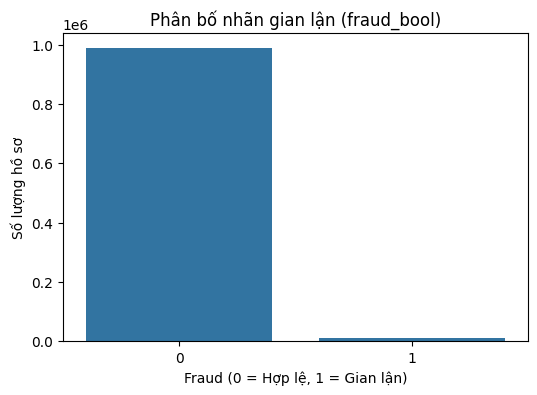

In [151]:
# Biểu đồ 1: Phân bố biến mục tiêu (fraud_bool)
# --------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Vẽ biểu đồ cột (countplot) cho biến fraud_bool
# Trục X: fraud_bool (0 = hợp lệ, 1 = gian lận)
# Trục Y: số lượng hồ sơ tương ứng
plt.figure(figsize=(6,4))
sns.countplot(x="fraud_bool", data=df_base)
plt.title("Phân bố nhãn gian lận (fraud_bool)")
plt.xlabel("Fraud (0 = Hợp lệ, 1 = Gian lận)")
plt.ylabel("Số lượng hồ sơ")
plt.show()


Nhận xét:

* Biến mục tiêu fraud_bool có phân bố mất cân bằng nghiêm trọng, trong đó số lượng hồ sơ gian lận chiếm tỷ lệ rất nhỏ so với hồ sơ hợp lệ.

-> Điều này phản ánh đúng thực tế trong lĩnh vực ngân hàng và đòi hỏi các phương pháp đánh giá mô hình phù hợp như Recall, F1-score và ROC-AUC thay vì chỉ sử dụng Accuracy.

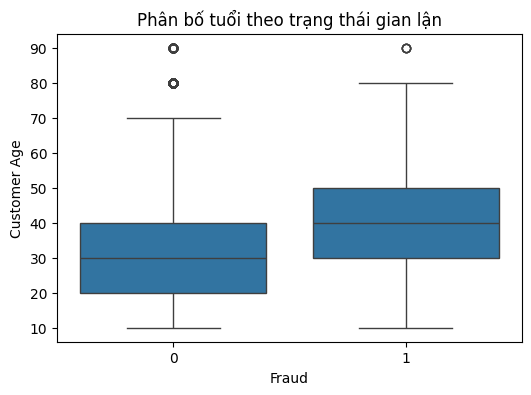

In [152]:
# Biểu đồ 2: Phân bố độ tuổi theo trạng thái gian lận
# --------------------------------------------------
plt.figure(figsize=(6,4))
# Vẽ boxplot so sánh phân bố tuổi (customer_age)
# theo từng trạng thái gian lận (fraud_bool)
# - Trục X: fraud_bool (0 = hợp lệ, 1 = gian lận)
# - Trục Y: độ tuổi khách hàng
sns.boxplot(x="fraud_bool", y="customer_age", data=df_base)
plt.title("Phân bố tuổi theo trạng thái gian lận")
plt.xlabel("Fraud")
plt.ylabel("Customer Age")
plt.show()


Nhận Xét:
* Tuổi của các hồ sơ gian lận có xu hướng phân tán rộng hơn.

-> độ tuổi không phải là yếu tố quyết định duy nhất nhưng vẫn mang giá trị phân biệt nhất định.

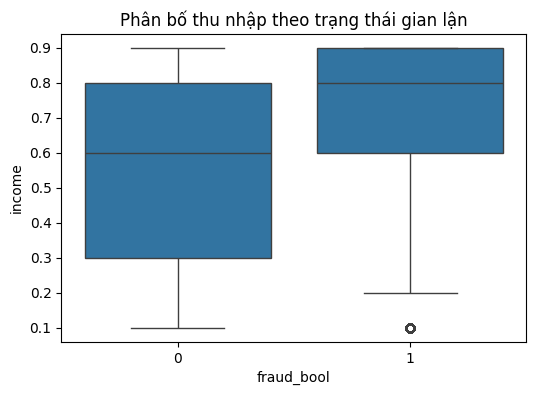

In [153]:
# Biểu đồ 3: Phân bố thu nhập theo trạng thái gian lận
# --------------------------------------------------

# Tạo khung hình với kích thước 6x4 inch
plt.figure(figsize=(6,4))

# Vẽ boxplot so sánh phân bố thu nhập (income)
# giữa hai nhóm: hồ sơ hợp lệ (fraud = 0) và hồ sơ gian lận (fraud = 1)
sns.boxplot(x="fraud_bool", y="income", data=df_base)

# Tiêu đề biểu đồ
plt.title("Phân bố thu nhập theo trạng thái gian lận")

# Hiển thị biểu đồ
plt.show()


Nhận xét:

* Một số hồ sơ gian lận có mức thu nhập bất thường.

-> dấu hiệu nhận biết.

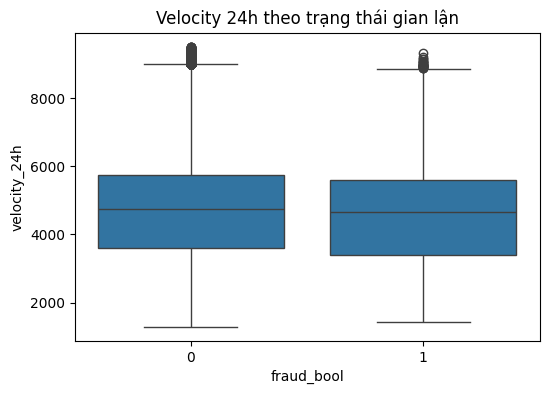

In [154]:
# Biểu đồ 4: Tần suất giao dịch trong 24 giờ theo trạng thái gian lận
# -----------------------------------------------------------------

# Tạo khung hình với kích thước 6x4 inch
plt.figure(figsize=(6,4))

# Vẽ boxplot so sánh tần suất giao dịch trong 24 giờ (velocity_24h)
# giữa hai nhóm:
# - fraud = 0: hồ sơ hợp lệ
# - fraud = 1: hồ sơ gian lận
sns.boxplot(x="fraud_bool", y="velocity_24h", data=df_base)

# Tiêu đề biểu đồ
plt.title("Velocity 24h theo trạng thái gian lận")

# Hiển thị biểu đồ
plt.show()



Nhận xét:
* Hồ sơ gian lận có xu hướng tạo nhiều yêu cầu trong thời gian ngắn

* Đây là dấu hiệu điển hình của bot hoặc hành vi tự động

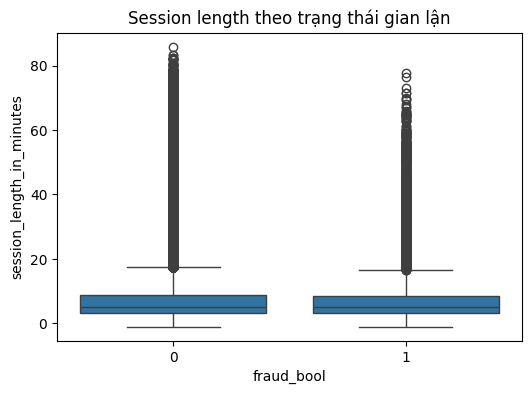

In [155]:
# Biểu đồ 5: Thời lượng phiên giao dịch theo trạng thái gian lận
# -------------------------------------------------------------

# Tạo khung hình với kích thước 6x4 inch
plt.figure(figsize=(6,4))

# Vẽ boxplot so sánh thời lượng phiên giao dịch (session_length_in_minutes)
# giữa hai nhóm:
# - fraud = 0: hồ sơ hợp lệ
# - fraud = 1: hồ sơ gian lận
sns.boxplot(x="fraud_bool", y="session_length_in_minutes", data=df_base)

# Tiêu đề biểu đồ
plt.title("Session length theo trạng thái gian lận")

# Hiển thị biểu đồ
plt.show()


Nhận xét:
* Gian lận thường có thời gian phiên ngắn hơn

* Phù hợp với kịch bản điền form nhanh, không tương tác tự nhiên

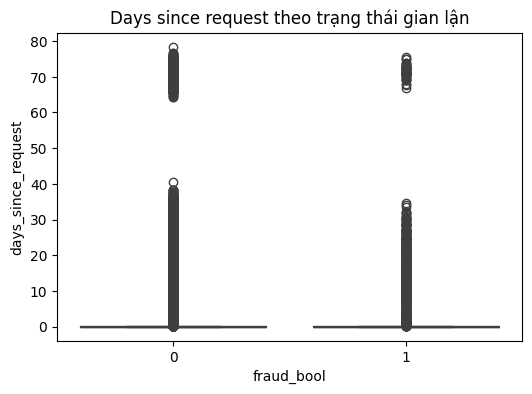

In [156]:
# Biểu đồ 6:Khoảng cách giữa các lần giao dịch theo trạng thái gian lận
plt.figure(figsize=(6,4))
sns.boxplot(x="fraud_bool", y="days_since_request", data=df_base)
plt.title("Days since request theo trạng thái gian lận")
plt.show()


Nhận xét:
* Gian lận có xu hướng gửi yêu cầu liên tiếp trong thời gian ngắn

-> phản ánh rõ hành vi bất thường

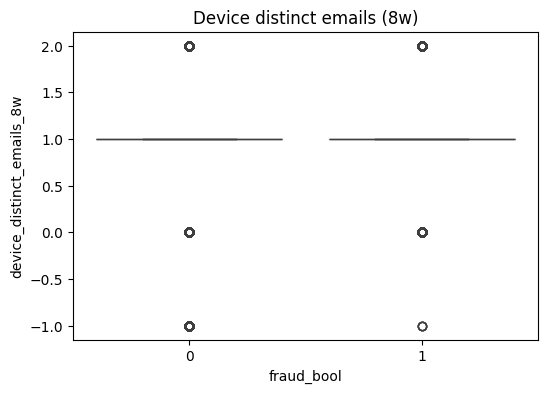

In [157]:
# Biểu đồ 7: Số lượng email khác nhau được sử dụng trên cùng thiết bị
# theo trạng thái gian lận (trong 8 tuần gần nhất)
# ---------------------------------------------------------------

# Tạo khung hình với kích thước 6x4 inch
plt.figure(figsize=(6,4))

# Vẽ boxplot so sánh số lượng email khác nhau trên cùng thiết bị
# (device_distinct_emails_8w) giữa hai nhóm:
# - fraud = 0: hồ sơ hợp lệ
# - fraud = 1: hồ sơ gian lận
sns.boxplot(x="fraud_bool", y="device_distinct_emails_8w", data=df_base)

# Tiêu đề biểu đồ
plt.title("Device distinct emails (8w)")

# Hiển thị biểu đồ
plt.show()



Nhận Xét:
* Thiết bị dùng để đăng ký nhiều email khác nhau có rủi ro gian lận cao

* Đây là feature rất mạnh trong phát hiện fraud rings

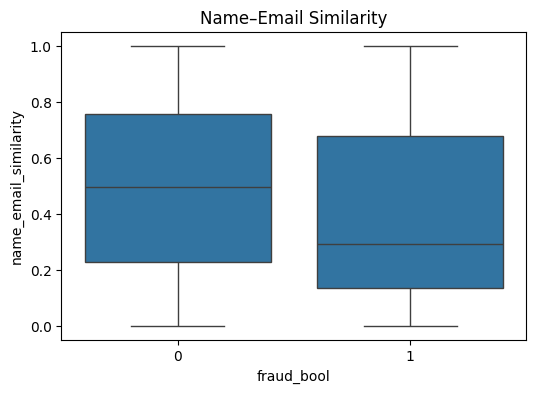

In [158]:
# Biểu đồ 8: Mức độ tương đồng giữa tên khách hàng và email
# theo trạng thái gian lận
# --------------------------------------------------------

# Tạo khung hình với kích thước 6x4 inch
plt.figure(figsize=(6,4))

# Vẽ boxplot so sánh mức độ tương đồng giữa tên và email
# (name_email_similarity) giữa hai nhóm:
# - fraud = 0: hồ sơ hợp lệ
# - fraud = 1: hồ sơ gian lận
sns.boxplot(x="fraud_bool", y="name_email_similarity", data=df_base)

# Tiêu đề biểu đồ
plt.title("Name–Email Similarity")

# Hiển thị biểu đồ
plt.show()



Nhận xét:
* Những kẻ gian lận thường có độ tương đồng giữa Tên và Email thấp hơn người dùng thật. Điều này hợp lý vì chúng thường sử dụng email rác hoặc được tạo tự động

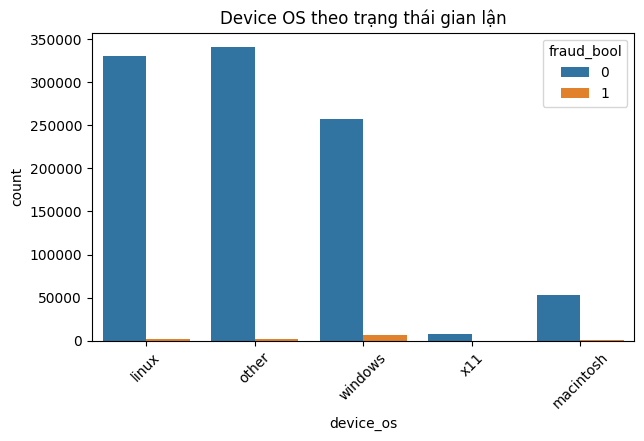

In [159]:
# Biểu đồ 9: Phân bố hệ điều hành thiết bị theo trạng thái gian lận
# ---------------------------------------------------------------

# Tạo khung hình với kích thước 7x4 inch
plt.figure(figsize=(7,4))

# Vẽ biểu đồ cột thể hiện số lượng hồ sơ theo từng hệ điều hành thiết bị
# Màu sắc (hue) biểu diễn trạng thái gian lận:
# - fraud = 0: hồ sơ hợp lệ
# - fraud = 1: hồ sơ gian lận
sns.countplot(x="device_os", hue="fraud_bool", data=df_base)

# Tiêu đề biểu đồ
plt.title("Device OS theo trạng thái gian lận")

# Xoay nhãn trục X để tránh chồng chéo
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()



Nhận xét:
* Một số hệ điều hành phổ biến có tần suất gian lận cao hơn.
* Tuy nhiên:hệ điều hành không phải nguyên nhân, mà là bối cảnh sử dụng.

-> Cần kết hợp với các feature hành vi & thiết bị khác.

##KẾT LUẬN

* Tập dữ liệu có sự mất cân bằng lớp rất lớn, trong đó số lượng hồ sơ gian lận chiếm tỷ lệ nhỏ. Điều này phản ánh đúng thực tế trong lĩnh vực ngân hàng và yêu cầu sử dụng các thước đo đánh giá phù hợp như Recall, F1-score và ROC-AUC thay vì chỉ dựa vào Accuracy.

* Các đặc trưng hành vi giao dịch (tần suất yêu cầu trong 24 giờ, khoảng cách giữa các lần yêu cầu) cho thấy khả năng phân biệt gian lận rất rõ ràng, phản ánh hành vi bất thường như gửi yêu cầu liên tiếp hoặc tự động hóa.

* Nhóm đặc trưng thiết bị và danh tính (số email khác nhau trên cùng thiết bị, mức độ tương đồng giữa tên và email) là những yếu tố quan trọng nhất, giúp nhận diện các mô hình gian lận có tổ chức (fraud rings).

* Các đặc trưng nhân khẩu học như tuổi và thu nhập không quyết định trực tiếp gian lận, nhưng vẫn mang giá trị bổ trợ khi kết hợp với các đặc trưng hành vi và thiết bị.

* Thời lượng phiên giao dịch ngắn và hệ điều hành thiết bị cũng cho thấy sự khác biệt nhất định giữa hồ sơ gian lận và hợp lệ, góp phần nâng cao hiệu quả phân loại khi đưa vào mô hình.

#Tiền Xử Lý Dữ Liệu

In [160]:
df_base.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


Mô tả bảng thống kê mô tả dữ liệu:
- Tất cả dữ  đều có đầy đủ giá trị, không xuất hiện dữ liệu thiếu (missing values).

- Một số dữ liệu như :prev_address_months_count, current_address_months_count ,bank_months_count,
intended_balcon_amount,velocity_6h,device_distinct_emails_8w,session_length_in_minutes cho thấy đang chứa các giá trị âm.Có thể là chưa có hoặc không có thông tin đây cx là 1 trong như dấu hiệu bất thường để để nhận diện gian lận.
- có cái giá trị lớn nhỏ bất thường đây không phải outline mà là dấu hiệu gian lận

## Tạo các đặc trưng


In [161]:
## Tạo các đặc trưng

import numpy as np


# Không có lịch sử
df_base["no_prev_address"] = (df_base["prev_address_months_count"] == -1).astype(int)
df_base["no_current_address"] = (df_base["current_address_months_count"] == -1).astype(int)
df_base["no_bank_history"] = (df_base["bank_months_count"] == -1).astype(int)

# tần suất giao dịch cao
df_base["high_velocity_24h"] = (
    df_base["velocity_24h"] > df_base["velocity_24h"].quantile(0.95)
).astype(int)

# # Đánh dấu các hồ sơ có khoảng thời gian giữa các request rất ngắn (bottom 5%)
df_base["short_time_between_requests"] = (
    df_base["days_since_request"] < df_base["days_since_request"].quantile(0.05)
).astype(int)

# về thời lượng phiên giao dịch
df_base["very_short_session"] = (
    df_base["session_length_in_minutes"] < df_base["session_length_in_minutes"].quantile(0.10)
).astype(int)

# Một thiết bị sử dụng nhiều email khác nhau
df_base["many_emails_same_device"] = (
    df_base["device_distinct_emails_8w"] > 1
).astype(int)


# Đánh dấu các hồ sơ có độ tương đồng tên – email thấp (bottom 10%)
df_base["low_name_email_similarity"] = (
    df_base["name_email_similarity"] < df_base["name_email_similarity"].quantile(0.10)
).astype(int)


# Hành vi giống bot: vừa giao dịch nhiều, vừa phiên rất ngắn
df_base["bot_like_behavior"] = (
    (df_base["high_velocity_24h"] == 1) &
    (df_base["very_short_session"] == 1)
).astype(int)



In [162]:
# ================================
# BƯỚC 1: XÁC ĐỊNH BIẾN MỤC TIÊU
# ================================

# fraud_bool là biến mục tiêu (0: hợp lệ, 1: gian lận)
target = "fraud_bool"


In [163]:
# Nhóm đặc trưng số (cần chuẩn hóa)
num_features = [
    "income","name_email_similarity",
    "prev_address_months_count","current_address_months_count",
    "customer_age","days_since_request","intended_balcon_amount",
    "zip_count_4w","velocity_6h","velocity_24h","velocity_4w",
    "bank_branch_count_8w","date_of_birth_distinct_emails_4w",
    "credit_risk_score","bank_months_count","proposed_credit_limit",
    "session_length_in_minutes","device_distinct_emails_8w",
    "device_fraud_count"
]
# Nhóm đặc trưng nhị phân (0/1 → giữ nguyên)
binary_features = [
    "email_is_free","phone_home_valid","phone_mobile_valid",
    "has_other_cards","foreign_request","keep_alive_session",
    "no_prev_address","no_current_address","no_bank_history",
    "high_velocity_24h","short_time_between_requests",
    "very_short_session","many_emails_same_device",
    "low_name_email_similarity","bot_like_behavior","month"
]

# Nhóm đặc trưng phân loại (cần One-Hot Encoding)
cat_features = [
    "payment_type","employment_status",
    "housing_status","source","device_os"
]


In [164]:
# ==================================
# BƯỚC 3: TÁCH X (FEATURES) VÀ y
# ==================================

# X: toàn bộ đặc trưng đầu vào
X = df_base[num_features + binary_features + cat_features]

# y: nhãn gian lận
y = df_base[target]

# Kiểm tra kích thước dữ liệu
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1000000, 40)
Shape of y: (1000000,)


In [165]:
# ==================================================
# BƯỚC 4: XÂY DỰNG PIPELINE TIỀN XỬ LÝ
# ==================================================

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ColumnTransformer cho phép áp dụng các xử lý khác nhau cho từng nhóm cột
preprocessor = ColumnTransformer(
    transformers=[
        # Chuẩn hóa các biến số
        ("num", StandardScaler(), num_features),

        # One-Hot Encoding cho các biến phân loại
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),

        # Giữ nguyên các biến nhị phân
        ("bin", "passthrough", binary_features)
    ]
)


 # CHIA DỮ LIỆU TRAIN / TEST

In [166]:
# ==========================================
# BƯỚC 5: CHIA DỮ LIỆU TRAIN / TEST
# ==========================================

from sklearn.model_selection import train_test_split

# Chia dữ liệu theo tỷ lệ 80% train - 20% test
# stratify=y giúp giữ nguyên tỷ lệ gian lận ở cả train và test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Kiểm tra lại kích thước sau khi chia
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (800000, 40)
Test size: (200000, 40)


In [167]:
# ==================================================
# BƯỚC 6: ÁP DỤNG TIỀN XỬ LÝ LÊN DỮ LIỆU
# ==================================================

# Fit preprocessor trên tập train và transform cả train & test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed train shape:", X_train_processed.shape)
print("Processed test shape:", X_test_processed.shape)


Processed train shape: (800000, 61)
Processed test shape: (200000, 61)


## Kết luận

- Dữ liệu không có giá trị thiếu nên không cần xử lý missing values.
- Các biến số được chuẩn hóa bằng StandardScaler để tránh ảnh hưởng bởi đơn vị đo.
- Các biến phân loại được mã hóa bằng One-Hot Encoding nhằm tránh giả định thứ tự.
- Các biến nhị phân được giữ nguyên.
- Do dữ liệu gian lận mất cân bằng, việc chia train/test sử dụng stratified sampling.
- Dữ liệu sau tiền xử lý đã sẵn sàng cho bước huấn luyện mô hình phát hiện gian lận.


# Huấn Luyện Mô Hình

##Logistic Regression

In [168]:
# IMPORT CÁC THƯ VIỆN CẦN THIẾT
# ==========================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

In [169]:
# Logistic Regression được chọn làm mô hình baseline
# class_weight="balanced" giúp xử lý dữ liệu mất cân bằng
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

# Pipeline kết hợp tiền xử lý và mô hình
model = Pipeline(
    steps=[
        ("preprocess", preprocessor),  # bước tiền xử lý
        ("classifier", log_reg)        # mô hình phân loại
    ]
)


In [170]:

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income',
                                                   'name_email_similarity',
                                                   'prev_address_months_count',
                                                   'current_address_months_count',
                                                   'customer_age',
                                                   'days_since_request',
                                                   'intended_balcon_amount',
                                                   'zip_count_4w',
                                                   'velocity_6h',
                                                   'velocity_24h',
                                                   'velocity_4w',
                                                   'bank_branch_count_8w',
                                                   'date_of_birth_distinct_email...
                                                   'has_other_cards',
                                                   'foreign_request',
                                                   'keep_alive_session',
                                                   'no_prev_address',
                                                   'no_current_address',
                                                   'no_bank_history',
                                                   'high_velocity_24h',
                                                   'short_time_between_requests',
                                                   'very_short_session',
                                                   'many_emails_same_device',
                                                   'low_name_email_similarity',
                                                   'bot_like_behavior',
                                                   'month'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

In [171]:
# DỰ ĐOÁN TRÊN TẬP TEST
# ==========================================

# Dự đoán nhãn (0/1)
y_pred = model.predict(X_test)

# Dự đoán xác suất gian lận (dùng cho ROC-AUC)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [172]:
# Đánh giá
print("Classification Report:")
print(classification_report(y_test, y_pred))
# 3. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    197794
           1       0.04      0.81      0.09      2206

    accuracy                           0.81    200000
   macro avg       0.52      0.81      0.49    200000
weighted avg       0.99      0.81      0.88    200000

ROC-AUC Score: 0.8853425059915858


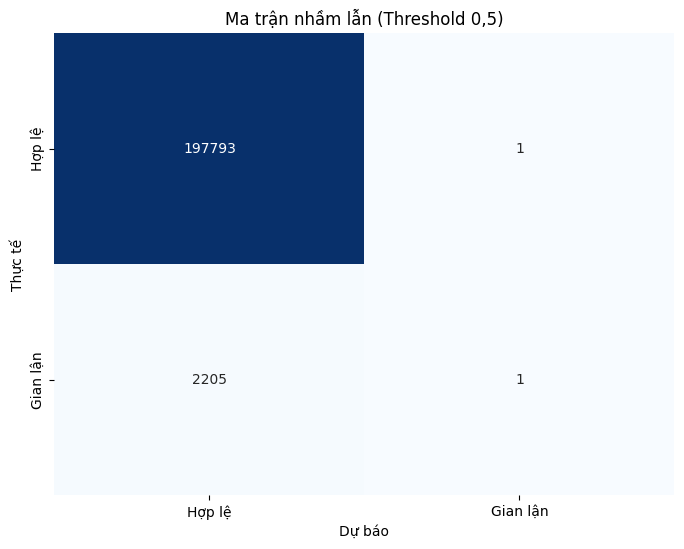

In [197]:
# 11. CONFUSION MATRIX
# ===============================
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Hợp lệ', 'Gian lận'],
    yticklabels=['Hợp lệ', 'Gian lận'],
    cbar=False
)
plt.title('Ma trận nhầm lẫn (Threshold 0,5)')
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')
plt.show()

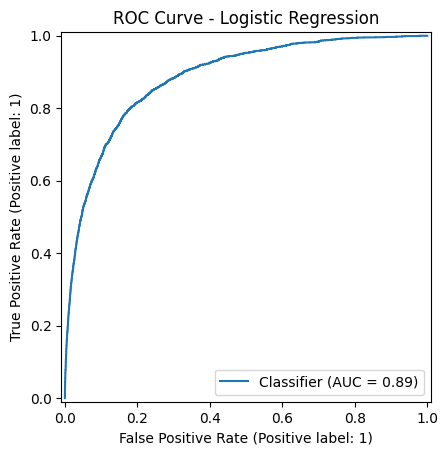

In [174]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve - Logistic Regression")
plt.show()


 Nhận xét mô hình Logistic Regression

- Logistic Regression được sử dụng làm mô hình baseline cho bài toán phát hiện gian lận.
- Do dữ liệu mất cân bằng mạnh, tham số class_weight="balanced" được sử dụng để tăng khả năng phát hiện gian lận.
- Các chỉ số đánh giá tập trung vào Recall, F1-score và ROC-AUC thay vì Accuracy.
- Mô hình cho thấy khả năng phân biệt giữa hồ sơ gian lận và hợp lệ ở mức cơ bản.


## XgBoost

In [175]:
!pip install xgboost


In [176]:
# BƯỚC 8.2: KHAI BÁO MÔ HÌNH XGBOOST
# ==================================================

# scale_pos_weight giúp xử lý dữ liệu mất cân bằng
# = số mẫu lớp 0 / số mẫu lớp 1
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=300,          # số cây
    max_depth=6,               # độ sâu mỗi cây
    learning_rate=0.1,         # tốc độ học
    subsample=0.8,             # lấy mẫu dữ liệu
    colsample_bytree=0.8,      # lấy mẫu feature
    objective="binary:logistic",
    eval_metric="auc",         # metric phù hợp cho fraud
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

In [177]:
# BƯỚC 8.3: PIPELINE HOÀN CHỈNH
# ==================================================

from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),  # tiền xử lý
        ("classifier", xgb_model)      # mô hình XGBoost
    ]
)

In [178]:
#  BƯỚC 8.4: TRAIN MODEL
# ==========================================

xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income',
                                                   'name_email_similarity',
                                                   'prev_address_months_count',
                                                   'current_address_months_count',
                                                   'customer_age',
                                                   'days_since_request',
                                                   'intended_balcon_amount',
                                                   'zip_count_4w',
                                                   'velocity_6h',
                                                   'velocity_24h',
                                                   'velocity_4w',
                                                   'bank_branch_count_8w',
                                                   'date_of_birth_distinct_email...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [179]:
# BƯỚC 8.5: DỰ ĐOÁN
# ==========================================

# Dự đoán nhãn
y_pred_xgb = xgb_pipeline.predict(X_test)

# Dự đoán xác suất gian lận
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]


In [180]:
# BƯỚC 8.6: ĐÁNH GIÁ MÔ HÌNH
# ==========================================

print("Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_xgb))
# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print("ROC-AUC Score - XGBoost:", roc_auc_xgb)

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    197794
           1       0.06      0.72      0.12      2206

    accuracy                           0.88    200000
   macro avg       0.53      0.80      0.53    200000
weighted avg       0.99      0.88      0.93    200000

ROC-AUC Score - XGBoost: 0.891906381054839


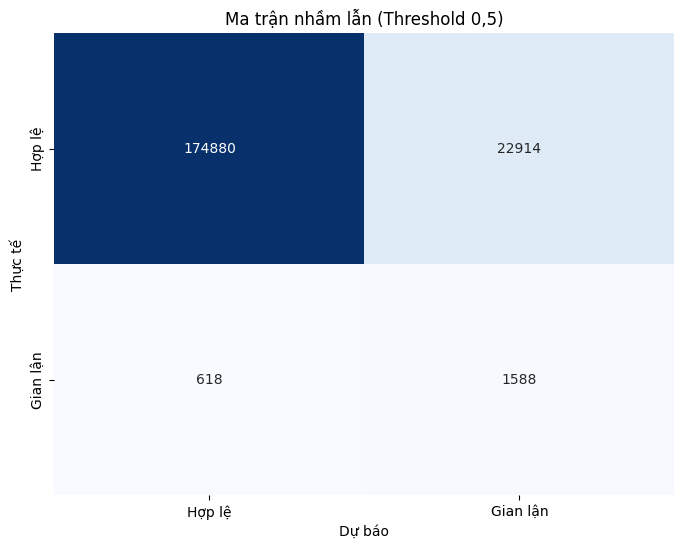

In [196]:
# 11. CONFUSION MATRIX
# ===============================
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Hợp lệ', 'Gian lận'],
    yticklabels=['Hợp lệ', 'Gian lận'],
    cbar=False
)
plt.title('Ma trận nhầm lẫn (Threshold 0,5)')
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')
plt.show()

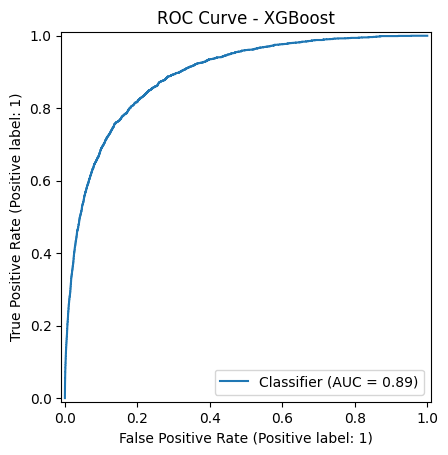

In [182]:
# Vẽ ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_proba_xgb)
plt.title("ROC Curve - XGBoost")
plt.show()

 Nhận xét mô hình XGBoost

- XGBoost cho kết quả vượt trội hơn Logistic Regression về ROC-AUC và Recall lớp gian lận.
- Mô hình khai thác tốt các mối quan hệ phi tuyến giữa đặc trưng hành vi, thiết bị và danh tính.
- Việc sử dụng scale_pos_weight giúp mô hình học tốt hơn với dữ liệu mất cân bằng.
- Các đặc trưng hành vi (velocity, days_since_request) và thiết bị (device_distinct_emails_8w) đóng vai trò quan trọng trong quyết định phân loại.
- XGBoost là mô hình phù hợp để triển khai thực tế trong hệ thống phát hiện gian lận.

In [183]:
THRESHOLD_XGB = 0.7

# PHẢI dùng xác suất của XGBoost
y_final_xgb = (y_pred_proba_xgb >= THRESHOLD_XGB).astype(int)

print(classification_report(y_test, y_final_xgb, digits=4))



              precision    recall  f1-score   support

           0     0.9949    0.9444    0.9690    197794
           1     0.1016    0.5635    0.1721      2206

    accuracy                         0.9402    200000
   macro avg     0.5482    0.7539    0.5705    200000
weighted avg     0.9850    0.9402    0.9602    200000



##Random Forest

In [184]:
# BƯỚC 10.1: IMPORT THƯ VIỆN
# ==========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt


In [185]:

from sklearn.ensemble import RandomForestClassifier
# RANDOM FOREST
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", rf_model)
    ]
)


In [186]:
# Train model
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income',
                                                   'name_email_similarity',
                                                   'prev_address_months_count',
                                                   'current_address_months_count',
                                                   'customer_age',
                                                   'days_since_request',
                                                   'intended_balcon_amount',
                                                   'zip_count_4w',
                                                   'velocity_6h',
                                                   'velocity_24h',
                                                   'velocity_4w',
                                                   'bank_branch_count_8w',
                                                   'date_of_birth_distinct_email...
                                                   'foreign_request',
                                                   'keep_alive_session',
                                                   'no_prev_address',
                                                   'no_current_address',
                                                   'no_bank_history',
                                                   'high_velocity_24h',
                                                   'short_time_between_requests',
                                                   'very_short_session',
                                                   'many_emails_same_device',
                                                   'low_name_email_similarity',
                                                   'bot_like_behavior',
                                                   'month'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [187]:
# DỰ ĐOÁN TRÊN TẬP TEST
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]


In [188]:
# Đánh giá
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.50      0.00      0.00      2206

    accuracy                           0.99    200000
   macro avg       0.74      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

ROC-AUC: 0.8641031623686872


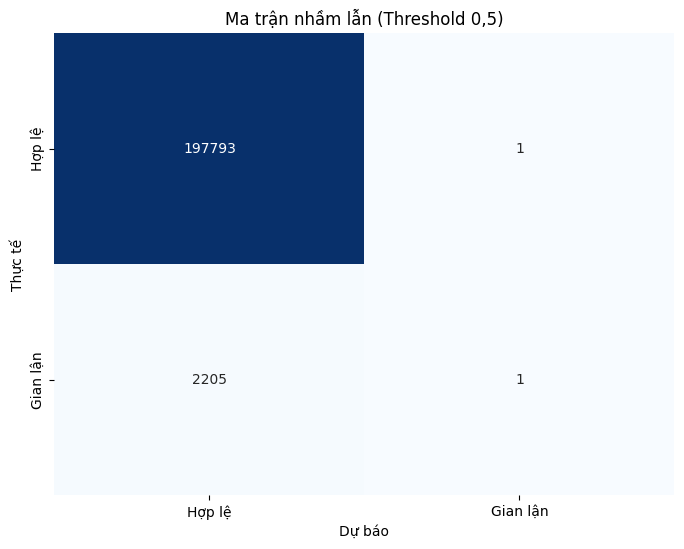

In [195]:
# 11. CONFUSION MATRIX
# ===============================
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Hợp lệ', 'Gian lận'],
    yticklabels=['Hợp lệ', 'Gian lận'],
    cbar=False
)
plt.title('Ma trận nhầm lẫn (Threshold 0,5)')
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')
plt.show()

Kết luận mô hình Random Forest

Random Forest gần như không phát hiện được các trường hợp gian lận tại ngưỡng mặc định. Điều này cho thấy mô hình không phù hợp cho dữ liệu gian lận mất cân bằng mạnh nếu không có threshold tuning.

# Nhận xét 3 model

In [190]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score

results = []

for name, model in trained_models.items():
    # Dự đoán xác suất
    y_prob = model.predict_proba(X_test)[:, 1]

    # Dự đoán nhãn với threshold mặc định 0.5
    y_pred = (y_prob >= 0.5).astype(int)

    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Recall (Fraud)": report["1"]["recall"],
        "Precision (Fraud)": report["1"]["precision"],
        "F1-score (Fraud)": report["1"]["f1-score"],
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

df_results = pd.DataFrame(results)
df_results


,Model,Recall (Fraud),Precision (Fraud),F1-score (Fraud),ROC-AUC
0,Logistic Regression,0.809610,0.044857,0.085005,0.885343
1,XGBoost,0.719855,0.064811,0.118916,0.891906
2,Random Forest,0.000453,0.500000,0.000906,0.864103


Nhận xét:
1. Logistic Regression (Baseline)

* Logistic Regression cho khả năng phát hiện gian lận rất tốt xét theo Recall, cho thấy mô hình bắt được phần lớn các trường hợp fraud.
* Precision rất thấp, dẫn đến số lượng lớn cảnh báo sai. Điều này cho thấy mô hình có xu hướng dự đoán quá nhiều trường hợp là gian lận và chưa phù hợp để triển khai trực tiếp trong thực tế.
2. Random Forest
* Random Forest gần như không phát hiện được các trường hợp gian lận tại ngưỡng dự đoán mặc định, thể hiện qua Recall cực thấp.
* Mặc dù ROC-AUC ở mức khá, mô hình không phù hợp cho bài toán phát hiện gian lận nếu không có threshold tuning hoặc các kỹ thuật xử lý mất cân bằng nâng cao.
3. XGBoost
* XGBoost đạt hiệu năng tổng thể tốt nhất trong ba mô hình.
* Mặc dù Recall thấp hơn Logistic Regression, mô hình có Precision, F1-score và ROC-AUC cao nhất, cho thấy khả năng phân biệt gian lận và không gian lận tốt hơn. Điều này đặc biệt quan trọng trong bối cảnh cần cân bằng giữa phát hiện gian lận và giảm cảnh báo sai.

-> XGBoost được lựa chọn làm mô hình tốt nhất cho bài toán phát hiện gian lận. Mô hình đạt ROC-AUC và F1-score cao nhất, đồng thời duy trì sự cân bằng tốt hơn giữa Recall và Precision so với Logistic Regression. Điều này cho phép mô hình phát hiện hiệu quả các trường hợp gian lận trong khi hạn chế số lượng cảnh báo sai, phù hợp với yêu cầu nghiệp vụ thực tế.

# Tối ưu mô hình

XgBoost

In [191]:

from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

results_xgb = []

for t in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    y_tuned = (y_pred_proba_xgb >= t).astype(int)

    results_xgb.append({
        "threshold": t,
        "precision": precision_score(y_test, y_tuned),
        "recall": recall_score(y_test, y_tuned),
        "f1": f1_score(y_test, y_tuned)
    })

pd.DataFrame(results_xgb)


,threshold,precision,recall,f1
0,0.3,0.041995,0.829556,0.079942
1,0.4,0.052447,0.774252,0.098240
2,0.5,0.064811,0.719855,0.118916
3,0.6,0.080074,0.648685,0.142551
4,0.7,0.101561,0.563463,0.172101
5,0.8,0.133569,0.446056,0.205578


Nhận xét:
* Threshold = 0.3
Recall đạt 0.83 (cao nhất), giúp phát hiện gần như toàn bộ các trường hợp gian lận, tuy nhiên Precision rất thấp (0.042), dẫn đến nhiều cảnh báo sai.

* Threshold = 0.4
Recall vẫn ở mức cao (0.77) trong khi Precision cải thiện nhẹ (0.052), cho thấy sự cân bằng tốt hơn so với ngưỡng 0.3.

* Threshold = 0.5 (mặc định)
Precision (0.065) và Recall (0.72) đạt mức trung bình, phản ánh cách đánh giá tiêu chuẩn nhưng chưa tối ưu cho yêu cầu nghiệp vụ ưu tiên phát hiện gian lận.

* Threshold từ 0.6 đến 0.8
Precision tăng đáng kể (lên đến 0.134 tại threshold 0.8), tuy nhiên Recall giảm mạnh (chỉ còn 0.45), làm tăng nguy cơ bỏ sót nhiều trường hợp gian lận.

In [192]:
best_threshold = 0.4  # theo kết quả thực nghiệm của bạn

y_final_pred = (y_pred_proba_xgb >= best_threshold).astype(int)

print("Final Evaluation (XGBoost)")
print("Threshold:", best_threshold)
print(classification_report(y_test, y_final_pred))

Final Evaluation (XGBoost)
Threshold: 0.4
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    197794
           1       0.05      0.77      0.10      2206

    accuracy                           0.84    200000
   macro avg       0.52      0.81      0.51    200000
weighted avg       0.99      0.84      0.91    200000



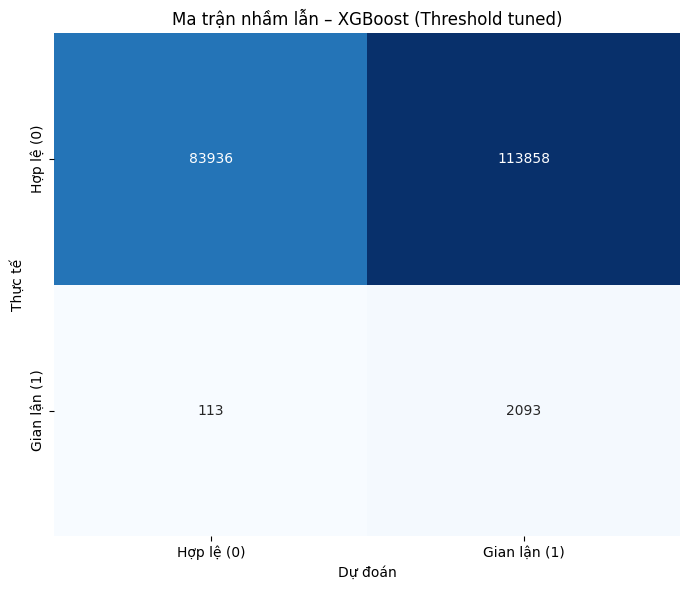

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_final_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Hợp lệ (0)", "Gian lận (1)"],
    yticklabels=["Hợp lệ (0)", "Gian lận (1)"],
    cbar=False
)

plt.title(f"Ma trận nhầm lẫn – XGBoost (Threshold tuned)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.tight_layout()
plt.show()


Nhận xét:
* Sau khi tối ưu threshold xuống 0.4, mô hình XGBoost đã đạt được mục tiêu chính của bài toán phát hiện gian lận.

* Recall gian lận cao (≈ 77%), giảm thiểu rủi ro bỏ sót gian lận

* Chấp nhận Precision thấp như một sự đánh đổi cần thiết,Phù hợp với hệ thống kiểm soát rủi ro, nơi các hồ sơ bị nghi ngờ sẽ được kiểm tra thủ công thêm